# <center>Exploring Mushroom Characteristics: A Data Mining Analysis for Mushroom Safety and Usage Classification</center>

| Course | Instructor | Full Name | Student Id| Date       | Term   |
|--------|------------|-----------|------------|--------|--------|
| ALY6040 | Dr Chinthaka Pathum Dinesh, Prof Herath Gedara| Abhilash Dikshit| 002702209 | Apr 27, 2023 | Winter |


In [116]:
import pandas as pd
from tabulate import tabulate
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# Read in the xlsx file
path_mush = '~/GitProjects/Python_Projects/Datasets/mushrooms.xlsx'
df = pd.read_excel(path_mush)

# Save the dataframe as a csv file
df.to_csv('mushrooms.csv', index=False)

# concatenate the two dataframes
#df = pd.concat([df.head(5), df.tail(5)])

# display the concatenated dataframe
display(df)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [118]:
df.shape

(8124, 23)

In [124]:
# Display basic information about the dataset
print('\033[1m Data Mining Analysis for Mushroom Safety and Usage Classification:\n' + '='*68 + '\033[0m')
table = [['Type', 'Length', 'Shape'], [type(df), len(df), df.shape]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

# Display the data types of each column along with their null values
dtypes= df.dtypes

# Check for null values in each column
null_counts = df.isnull().sum()

# Rename columns
combine_details = pd.concat([dtypes, null_counts], axis=1)
combine_details = combine_details.rename(columns={0: 'Datatype', 1: 'Null_Count'})

combine_details['Length'] = [len(df[col]) for col in df.columns]

# Print result
print(combine_details)


 Data Mining Analysis for Mushroom Safety and Usage Classification:
╒═══════════════════════════════════════╤══════════╤════════════╕
│ Type                                  │   Length │ Shape      │
╞═══════════════════════════════════════╪══════════╪════════════╡
│ <class 'pandas.core.frame.DataFrame'> │     8124 │ (8124, 23) │
╘═══════════════════════════════════════╧══════════╧════════════╛
                         Datatype  Null_Count  Length
class                      object           0    8124
cap-shape                  object           0    8124
cap-surface                object           0    8124
cap-color                  object           0    8124
bruises                    object           0    8124
odor                       object           0    8124
gill-attachment            object           0    8124
gill-spacing               object           0    8124
gill-size                  object           0    8124
gill-color                 object           0    8124
stalk-sh

In [125]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [126]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col]) 
    
display(df_encoded)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [127]:
#column "veil-type" is 0 and not contributing to the data.
df_encoded=df_encoded.drop(["veil-type"],axis=1)

In [128]:
df_encoded.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


## Data Visualization

### Check if the data is balanced?

In [129]:
df_encoded.shape

(8124, 22)

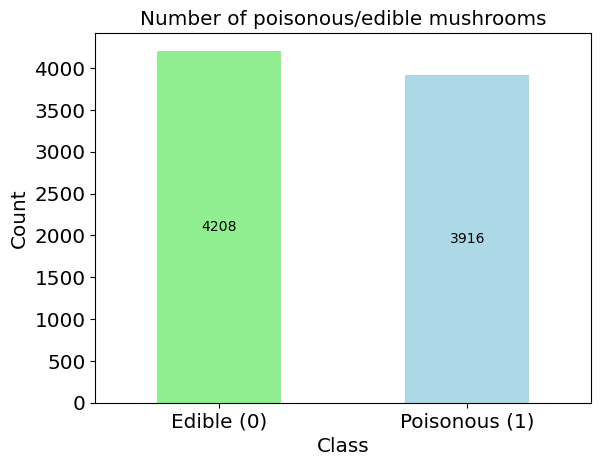

In [130]:
# create a dictionary of colors for each class
color_dict = {0: 'lightgreen', 1: 'lightblue'}

# plot the count for each class
plt.figure()
counts = pd.Series(df_encoded['class']).value_counts().sort_index()
ax = counts.plot(kind='bar', color=counts.index.map(color_dict))
plt.ylabel("Count")
plt.xlabel("Class")
plt.title('Number of poisonous/edible mushrooms')

# add count labels inside each bar
for i, v in enumerate(counts):
    ax.text(i, v/2, str(v), ha='center', va='center')

# add labels for class values with horizontal rotation
ax.set_xticklabels(['Edible (0)', 'Poisonous (1)'], rotation=0)

plt.show()

As per the above visualization, the dataset is balanced

### Plot pairwise relationships in a mushrooms for each stalk categorize.

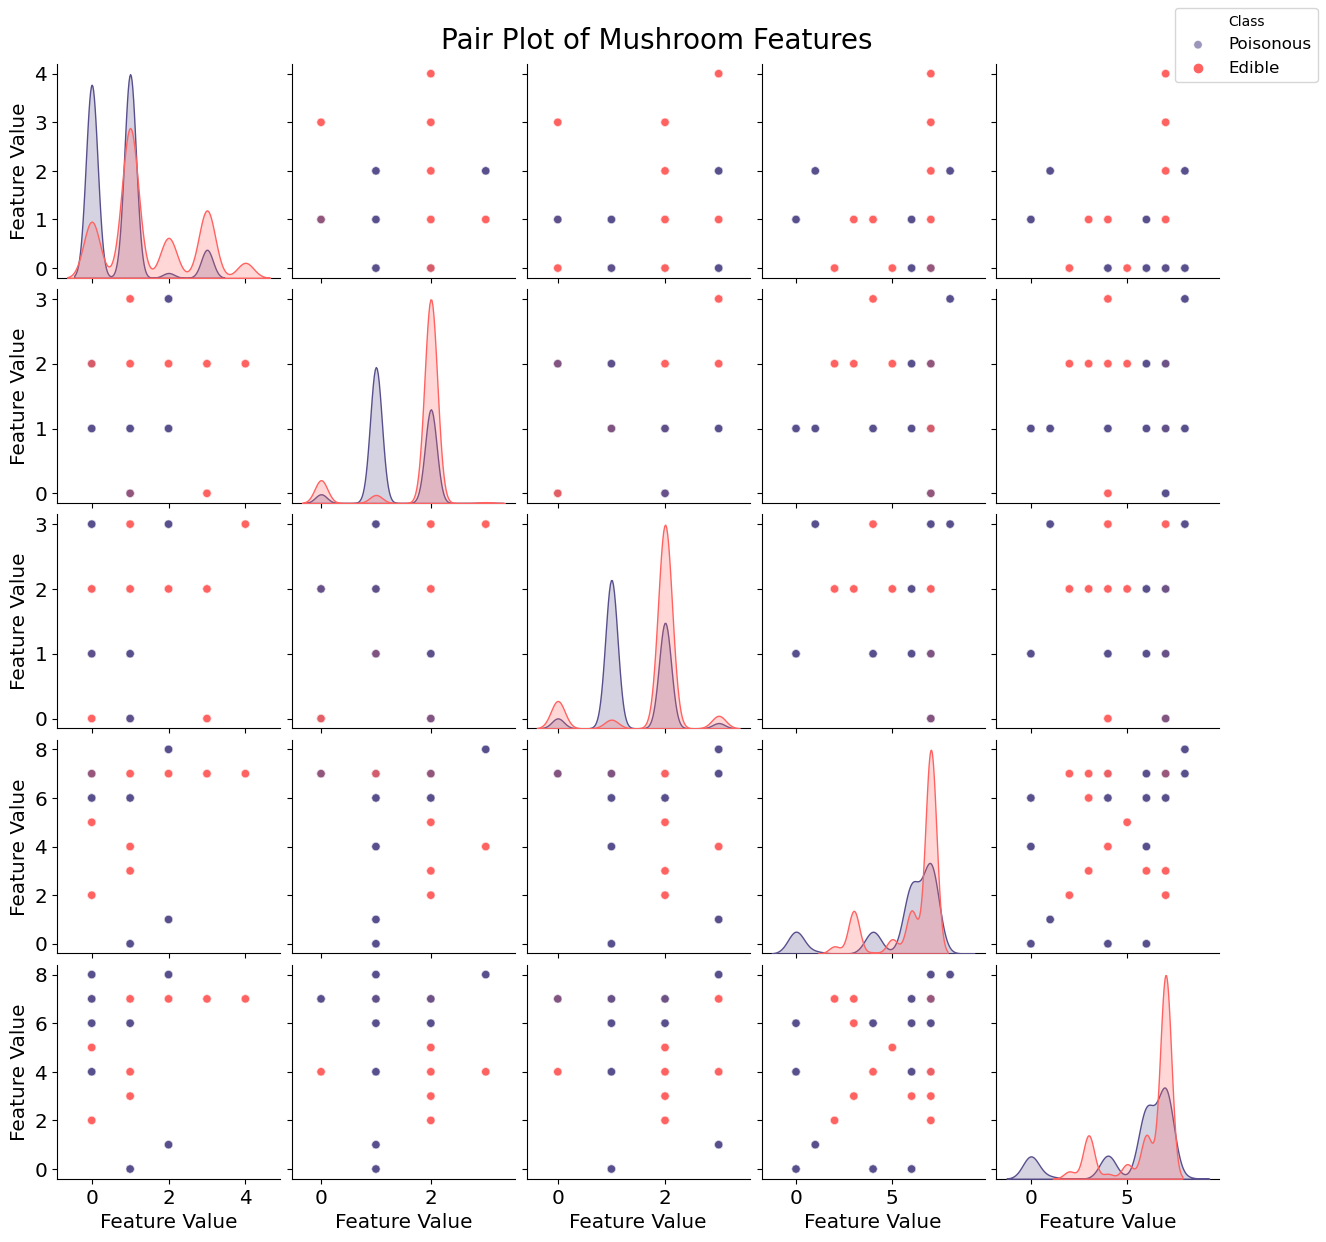

In [133]:
import seaborn as sns

# Define the variables to plot
stalk_cats = ['class', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
              'stalk-color-above-ring', 'stalk-color-below-ring']

# Subset the dataframe based on the selected variables
df_cats = df_encoded[stalk_cats]

# Define the color palette
colors = ['#FF6361', '#58508D']

# Create a pair plot
g = sns.pairplot(df_cats, hue='class', palette=colors, diag_kind='kde', plot_kws={'alpha': 0.6})

# Set plot titles and axis labels
g.fig.suptitle('Pair Plot of Mushroom Features', fontsize=20)
g.set(xlabel='Feature Value', ylabel='Feature Value')

# Add a legend
g._legend.remove()
g.fig.subplots_adjust(top=0.95)
g.fig.legend(title='Class', loc='upper right', labels=['Poisonous', 'Edible'], fontsize=12)

# Show the plot
plt.show()


#### Bar chart to visualize the number of mushrooms for each cap color categorize:

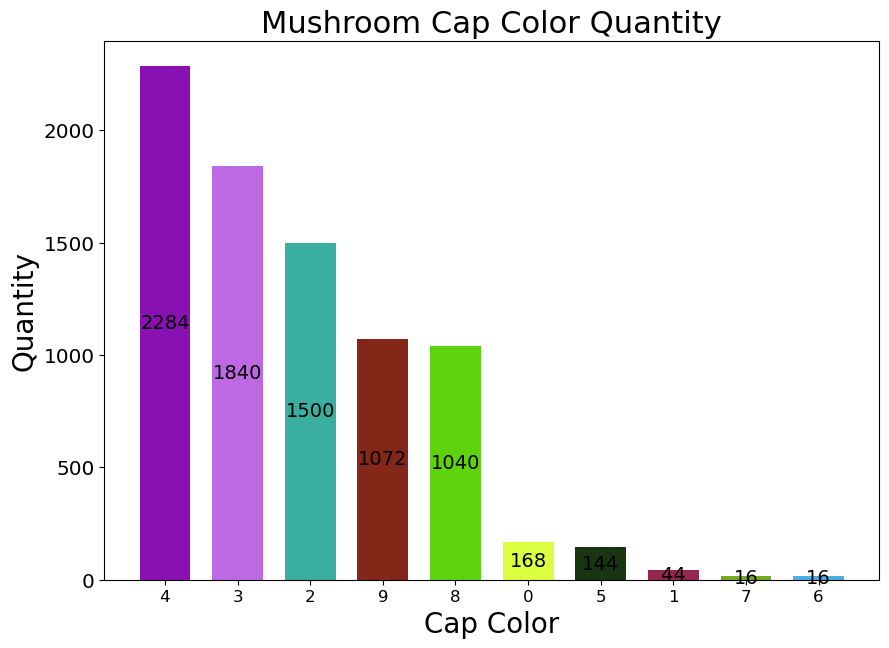

In [139]:
import random

mushrooms = df_encoded

# Obtain total number of mushrooms for each 'cap-color' (Entire DataFrame)
cap_colors = mushrooms['cap-color'].value_counts()
m_height = cap_colors.values.tolist() # Provides numerical values
cap_color_labels = cap_colors.axes[0].tolist() # Converts index object to list

# Define the colors dynamically based on the number of unique cap colors
colors = ['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range(len(cap_color_labels))]

# =====PLOT Preparations and Plotting====#
ind = np.arange(len(cap_color_labels))  # the x locations for the groups
width = 0.7  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 7))
mushroom_bars = ax.bar(ind, m_height, width, color=colors)

# Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color", fontsize=20)
ax.set_ylabel('Quantity', fontsize=20)
ax.set_title('Mushroom Cap Color Quantity', fontsize=22)
ax.set_xticks(ind)  # Positioning on the x axis
ax.set_xticklabels(cap_color_labels, fontsize=12)

# Auto-labels the number of mushrooms for each bar color.
def autolabel(rects, fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., height / 2, '%d' % int(height),
                ha='center', va='center', fontsize=fontsize)

autolabel(mushroom_bars)
plt.show() # Display bars.


### Correlation between the variables:

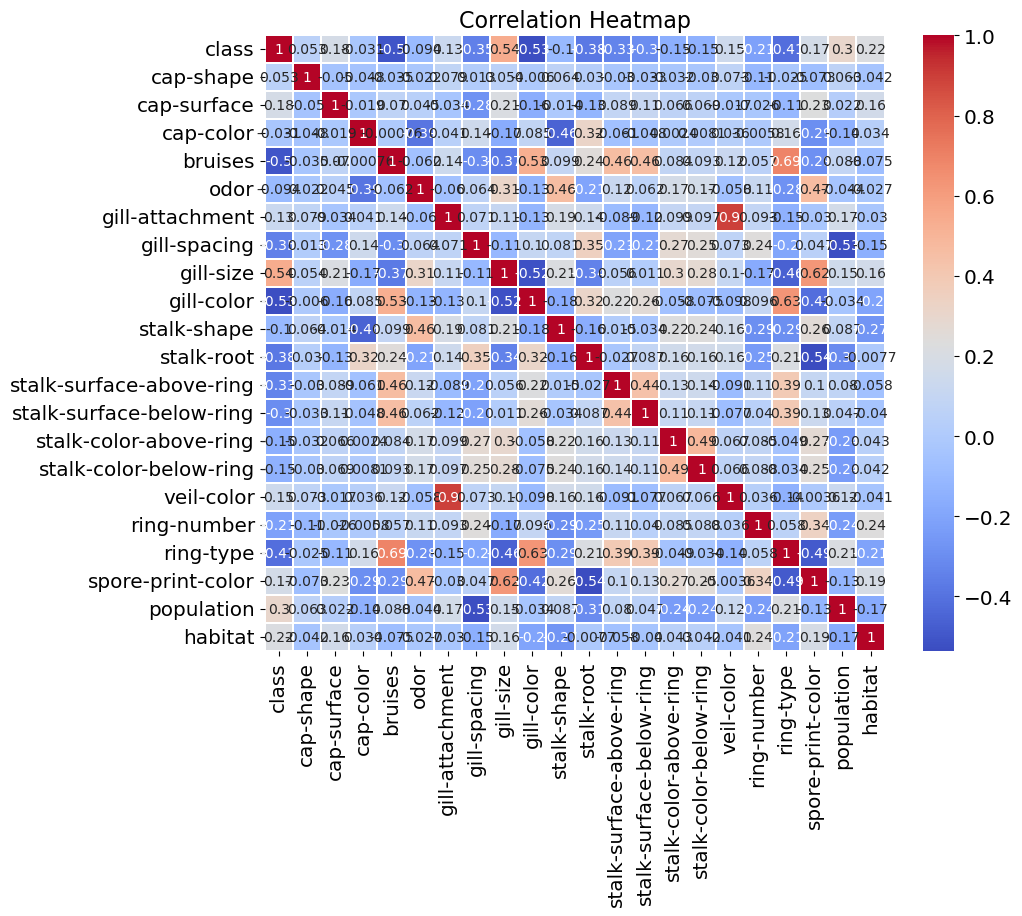

In [142]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(df_encoded.corr(), linewidths=0.1, cmap="coolwarm", annot=True)

# Rotate the y-tick labels
plt.yticks(rotation=0)

# Add a title
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()


### Model, predict and estimate the result:
For the mushroom classification dataset, we will use decision tree classifier.

In [160]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Split the data into training and testing sets
X = df_encoded.drop(['class'], axis=1)
Y = df_encoded['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

# Create the decision tree classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

# Visualize the decision tree using graphviz
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [144]:
display(X_train)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1687,2,0,3,0,5,1,1,0,3,1,...,0,2,7,7,2,1,0,3,3,1
1614,2,2,4,1,6,1,0,1,7,0,...,2,2,7,7,2,1,4,3,4,1
8048,3,2,4,0,8,1,0,1,0,1,...,2,1,7,6,2,1,0,7,4,0
1487,2,2,8,0,5,1,1,0,4,1,...,0,0,7,7,2,1,0,2,3,1
1516,2,0,4,0,5,1,1,0,3,1,...,2,0,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,5,3,2,0,8,1,0,1,0,1,...,1,1,6,6,2,1,0,7,4,0
5814,2,0,1,0,5,1,1,1,10,0,...,2,2,7,4,2,1,0,7,4,2
3597,5,0,3,0,2,1,0,0,2,0,...,1,1,6,0,2,1,2,1,5,1
3514,2,3,2,1,5,1,0,0,10,1,...,2,2,6,6,2,1,4,2,5,0


In [145]:
display(X_test)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6813,2,2,2,0,8,1,0,1,0,1,...,1,1,7,7,2,1,0,7,4,4
634,5,3,4,1,0,1,0,0,7,0,...,2,3,7,7,2,1,4,3,3,1
448,0,2,8,1,3,1,0,0,10,0,...,2,2,7,7,2,1,4,2,3,3
2106,2,0,4,1,5,1,0,0,7,1,...,2,2,7,7,2,1,4,3,4,0
3378,2,3,2,1,5,1,0,0,10,1,...,2,2,3,3,2,1,4,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,5,0,8,0,1,1,0,1,9,0,...,2,2,7,7,2,1,4,3,4,0
8098,3,2,2,0,8,1,0,1,0,1,...,1,1,7,6,2,1,0,7,4,0
3847,2,3,2,1,5,1,0,0,10,1,...,2,2,3,3,2,1,4,3,5,0
5373,5,2,8,1,2,1,0,0,7,1,...,0,2,7,7,2,1,4,1,3,1


In [146]:
display(Y_train)

1687    0
1614    1
8048    1
1487    0
1516    0
       ..
5573    1
5814    0
3597    1
3514    0
5599    0
Name: class, Length: 7311, dtype: int64

In [147]:
display(Y_test)

6813    1
634     0
448     0
2106    0
3378    0
       ..
3754    1
8098    1
3847    0
5373    1
552     0
Name: class, Length: 813, dtype: int64

In [157]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH